## Delhi Air Quality Dataset-EDA
<img src ="https://i.postimg.cc/bwkWzYGP/Chat-GPT-Image-Sep-8-2025-07-30-37-PM.png" width="1000" height="600"> <br>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
file_path = "final_dataset.csv"   # update path if needed
df = pd.read_csv(file_path)


In [6]:
# 1. Basic Dataset Overview

In [7]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include="all").T)


Shape of dataset: (1461, 12)

Column Names:
 ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

Data Types:
 Date                int64
Month               int64
Year                int64
Holidays_Count      int64
Days                int64
PM2.5             float64
PM10              float64
NO2               float64
SO2               float64
CO                float64
Ozone             float64
AQI                 int64
dtype: object

Missing Values:
 Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

Summary Statistics:
                  count         mean         std      min      25%      50%  \
Date            1461.0    15.729637    8.803105     1.00     8.00    16.00   
Month           1461.0     6.522930    3.449884     1.00     

## 2. Distribution of Numeric Columns

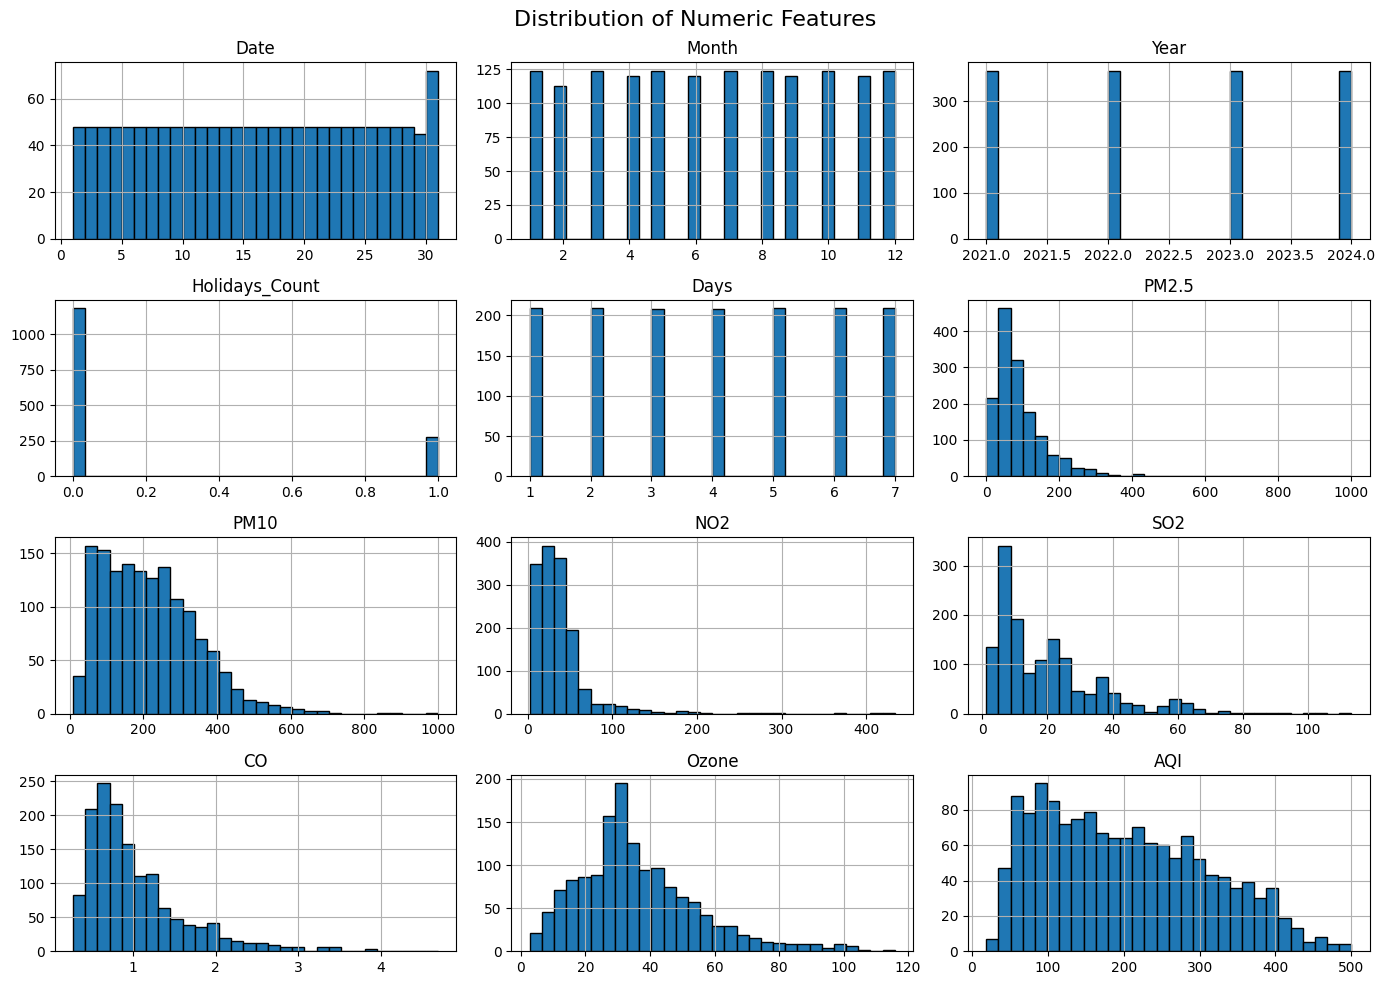

In [9]:
df.hist(figsize=(14,10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap

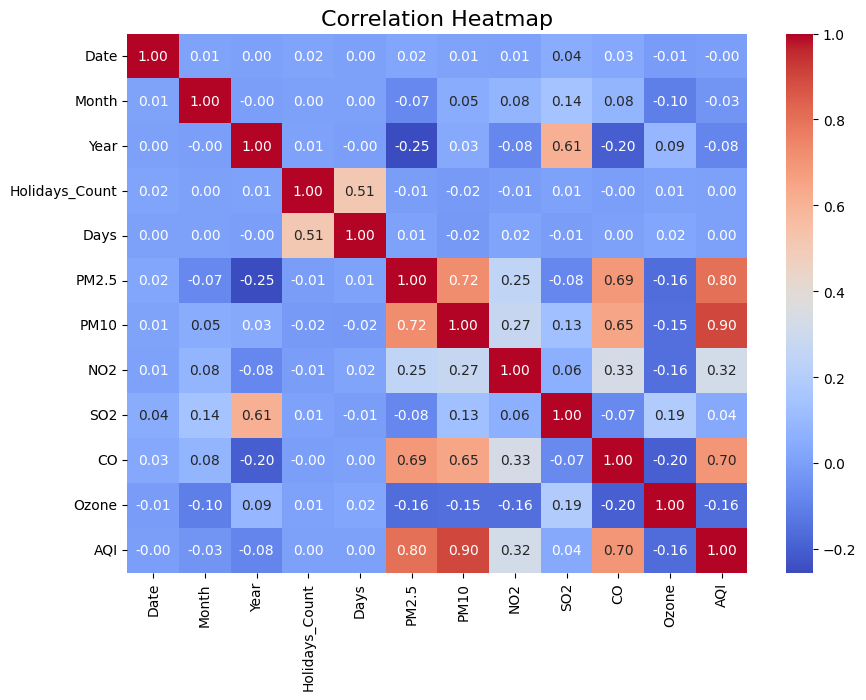

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 4. Pairplot for Relationships

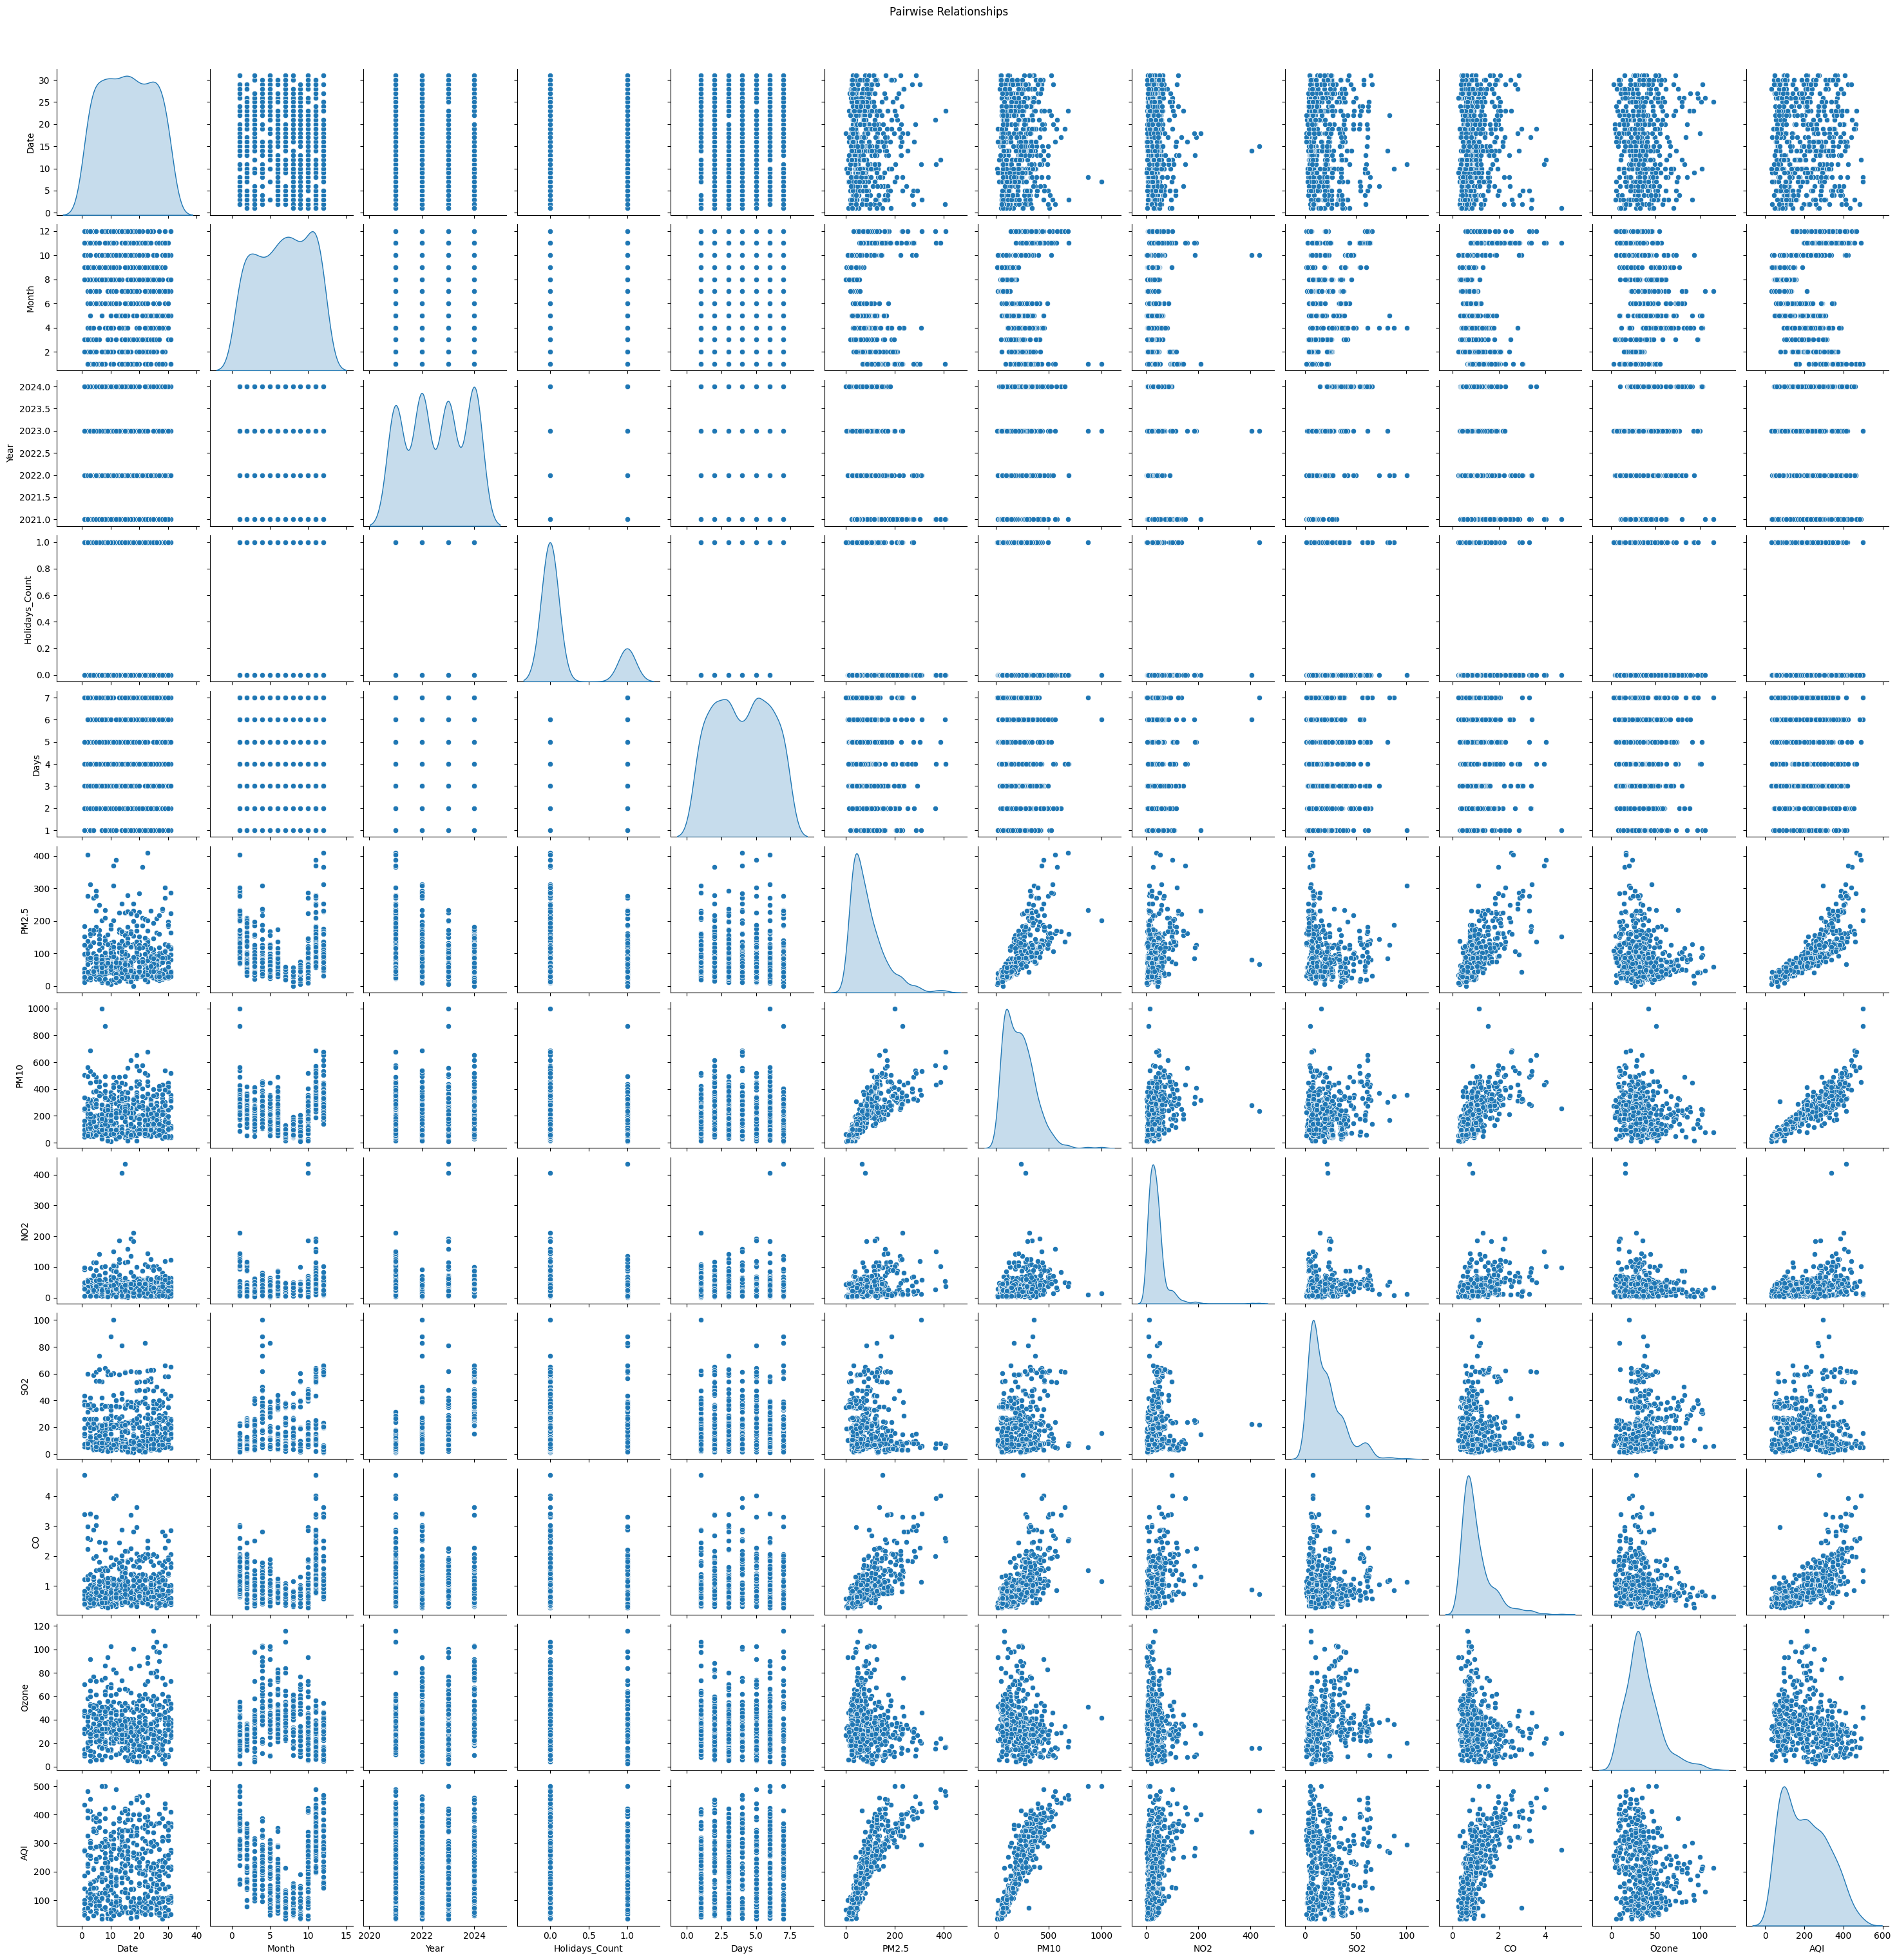

In [12]:
sns.pairplot(df.select_dtypes(include="number").sample(min(500, len(df))), diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# 5. Boxplots for Outlier Detection

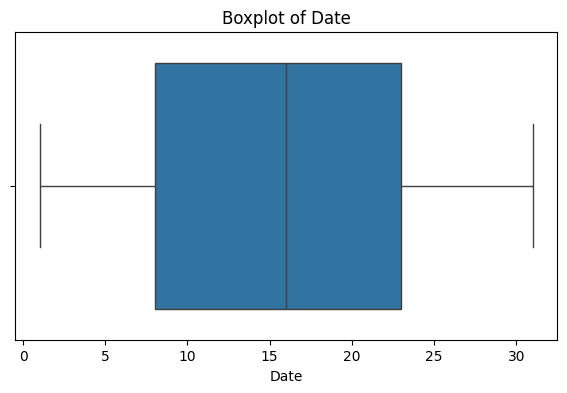

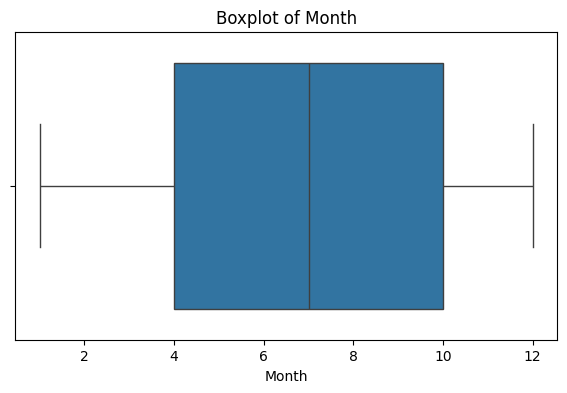

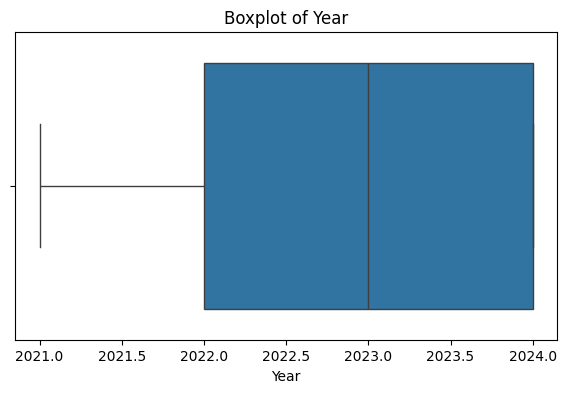

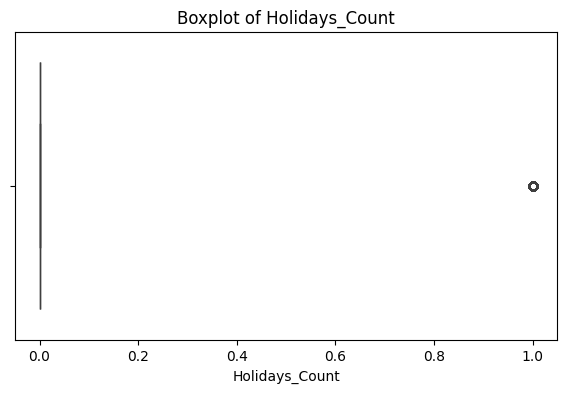

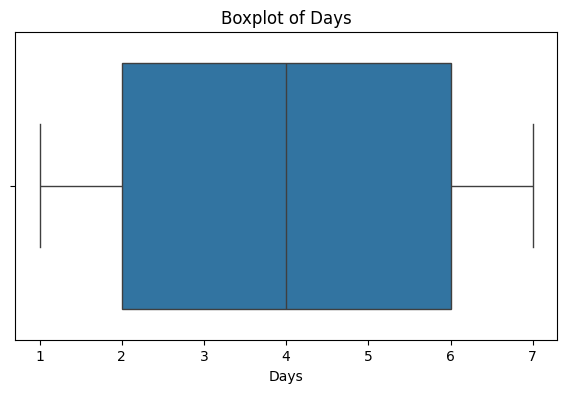

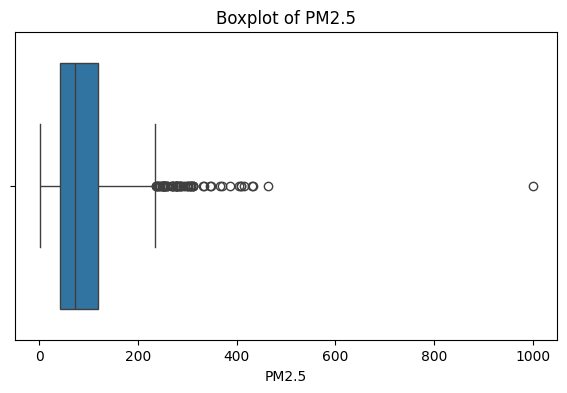

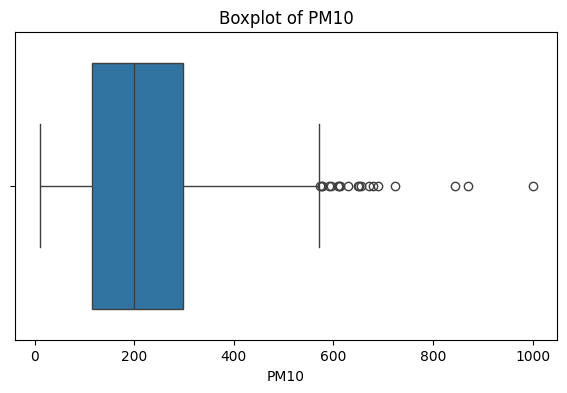

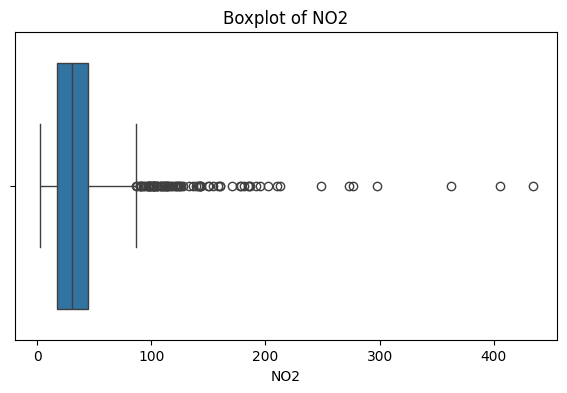

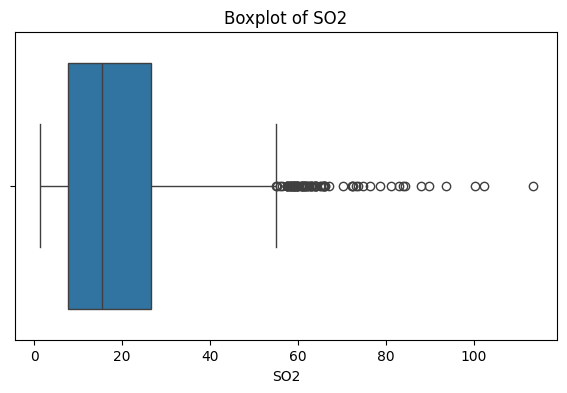

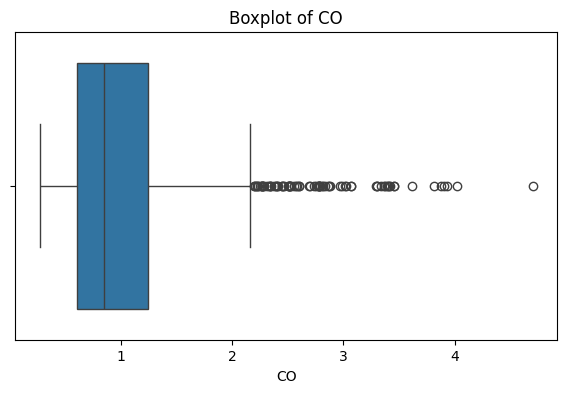

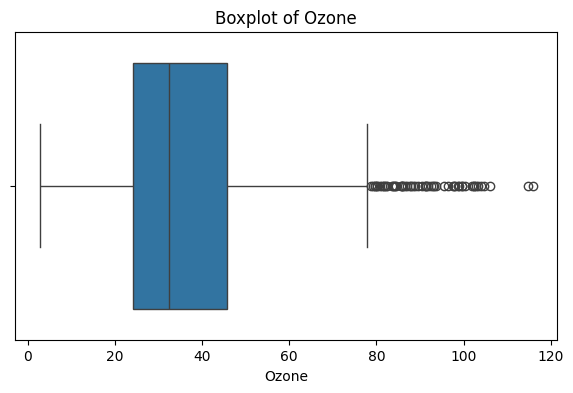

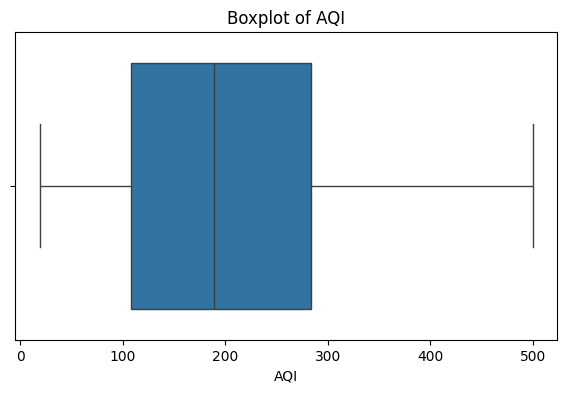

In [13]:
numeric_cols = df.select_dtypes(include="number").columns
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 6. Category-wise Analysis (if categorical cols exist)

In [16]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 7. Time Series Analysis (if 'date' column exists)

In [17]:
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    monthly = df.groupby(df["date"].dt.to_period("M")).size()
    monthly.plot(kind="line", marker="o", figsize=(12,5))
    plt.title("Monthly Trend of Records")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.show()

## Project Summary - Delhi Air Quality dataset Analysis

This project analyzes the Delhi Air Quality dataset to study pollution trends across key pollutants like PM2.5, PM10, NO₂, SO₂, CO, and O₃. The analysis shows that PM2.5 and PM10 levels are consistently above safe limits, with severe peaks in winter due to stubble burning and weather conditions. Air quality improves slightly during the monsoon as rainfall reduces particulate matter. Higher levels of NO₂ and SO₂ were observed in traffic and industrial areas, while strong correlations between PM2.5 and PM10 suggest common pollution sources. Overall, the study highlights Delhi’s critical air pollution problem and the urgent need for stricter policies and awareness.

## Future work -Delhi Air Quality Dataset

Future work on the Delhi Air Quality dataset can focus on building predictive models using machine learning to forecast pollution levels and provide early warnings. A comparative study with other major Indian cities can offer broader insights into regional pollution trends. Long-term health impact assessments based on AQI data will help understand the consequences of prolonged exposure. Further research can also evaluate the effectiveness of government policies and interventions on improving air quality. Additionally, incorporating real-time sensor data will enable more accurate and timely analysis for decision-making.

## References

Medium: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
Kaggle: https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis